# detecting license plate recognition on photos using mobilenetv2-ssd tflite model

In [3]:
import cv2
import numpy as np
import glob
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
import requests,io,os
print('TensorFlow version:', tf.__version__)


TensorFlow version: 2.4.1


Скачать файл обученной сетки обнаружениня положения номера "model_resnet.tflite" (203,9 МБ) c https://disk.yandex.ru/d/QavLH1pvpRhLOA .

Код для загрузки:

In [4]:
if not os.path.isfile('../model_resnet.tflite'):
    API_ENDPOINT = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key={}'
    link_r = requests.get(API_ENDPOINT.format('https://disk.yandex.ru/d/QavLH1pvpRhLOA'))
    response= requests.get(link_r.json()['href'])
    if response.status_code == 200:
        with open("../model_resnet.tflite", 'wb') as f:
            f.write(response.content)


In [5]:
names=glob.glob('./test/*')
names

['./test/10914img1.jpg',
 './test/2252-200618-155742-0.jpg',
 './test/24da94u-960.jpg',
 './test/6666.jpg',
 './test/7777.jpeg',
 './test/9999.jpeg',
 './test/a999aa777.jpg',
 './test/b293ec777.jpg',
 './test/b905736s-1920.jpg',
 './test/images (2).jpeg']

In [6]:
paths='../model_resnet.tflite'
interpreter = tf.lite.Interpreter(model_path=paths)
interpreter.allocate_tensors()
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

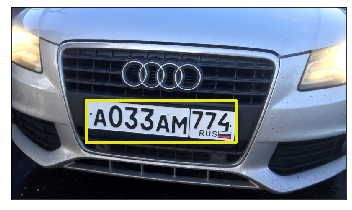

уверенность  0.8872849


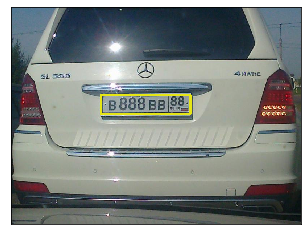

уверенность  0.7818546


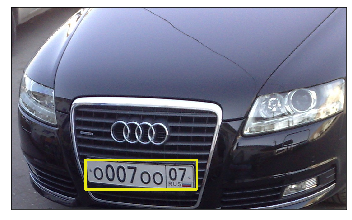

уверенность  0.9280629


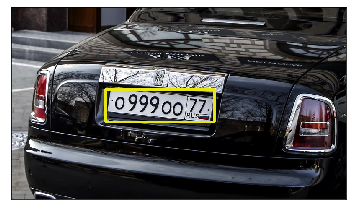

уверенность  0.88087285


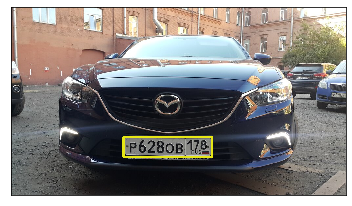

уверенность  0.9037415


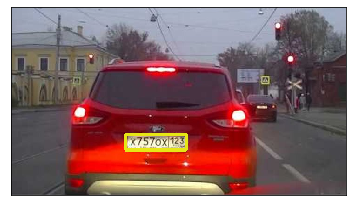

уверенность  0.7194728


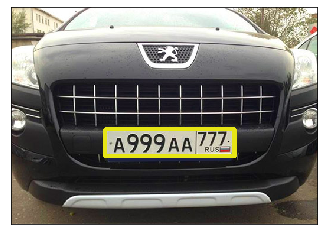

уверенность  0.83487844


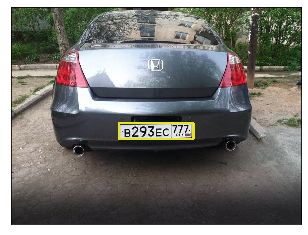

уверенность  0.8505017


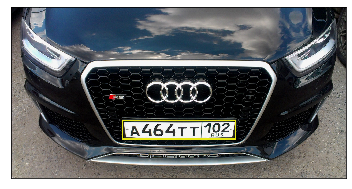

уверенность  0.8362295


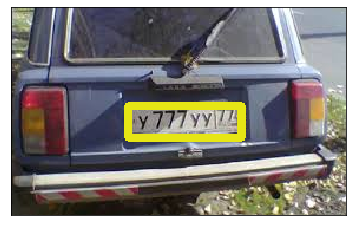

уверенность  0.7799641


In [7]:
for i in names:

    img_name1=i
    image0 = cv2.imread(img_name1,1)
    image_height, image_width, _ = image0.shape
    image = cv2.resize(image0, (1024,1024))
    image = image.astype(np.float32)
    X_data1=np.float32(image.reshape(1,1024, 1024,3))
    input_index = (interpreter.get_input_details()[0]['index'])
    interpreter.set_tensor(input_details[0]['index'], X_data1)
    interpreter.invoke()
    detection = interpreter.get_tensor(output_details[0]['index'])
    net_out_value2 = interpreter.get_tensor(output_details[1]['index'])
    net_out_value3 = interpreter.get_tensor(output_details[2]['index'])
    net_out_value4 = interpreter.get_tensor(output_details[3]['index'])
    img = image0
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other

    
    if net_out_value3[0][0]>0.085: #Порог уверенности
            box_x =int( detection[0,0,0] * image_height)
            box_y = int(detection[0,0,1] * image_width)
            box_width =int( detection[0,0,2] * image_height)
            box_height = int(detection[0,0,3] * image_width)
            if  np.min(detection[0,0,:])>=0:
               
                cv2.rectangle(img2, ( box_y,box_x), (box_height,box_width ), (230, 230, 21), thickness=5)
                
    plt.imshow(img2)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    print('уверенность ',net_out_value3[0][0])
